In [456]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [457]:
# Load dataset
file_path = 'ML DATASET.csv'
df = pd.read_csv(file_path)
print("Dataset Preview:")
df.head(10)

Dataset Preview:


,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,01-12-1996,CTG0001.txt,240,357,120,120,0,0,0,...,0,0,0,0,0,0,1,0,9,2
1,Fmcs_1.txt,03-05-1996,CTG0002.txt,5,632,132,132,4,0,4,...,0,0,0,1,0,0,0,0,6,1
2,Fmcs_1.txt,03-05-1996,CTG0003.txt,177,779,133,133,2,0,5,...,0,0,0,1,0,0,0,0,6,1
3,Fmcs_1.txt,03-05-1996,CTG0004.txt,411,1192,134,134,2,0,6,...,0,0,0,1,0,0,0,0,6,1
4,Fmcs_1.txt,03-05-1996,CTG0005.txt,533,1147,132,132,4,0,5,...,0,0,0,0,0,0,0,0,2,1
5,Fmcs_2.txt,03-05-1996,CTG0006.txt,0,953,134,134,1,0,10,...,0,0,0,0,0,1,0,0,8,3
6,Fmcs_2.txt,03-05-1996,CTG0007.txt,240,953,134,134,1,0,9,...,0,0,0,0,0,1,0,0,8,3
7,Hasc_1.txt,22-02-1995,CTG0008.txt,62,679,122,122,0,0,0,...,0,0,0,0,0,0,1,0,9,3
8,Hasc_1.txt,22-02-1995,CTG0009.txt,120,779,122,122,0,0,1,...,0,0,0,0,0,0,1,0,9,3
9,Hasc_1.txt,22-02-1995,CTG0010.txt,181,1192,122,122,0,0,3,...,0,0,0,0,0,0,1,0,9,3


In [458]:
# Drop unnecessary columns
columns_to_drop = ['FileName', 'Date', 'SegFile', 'CLASS','A','B','C','D','E','AD','DE','LD','FS','SUSP','CLASS','b','e','LBE']
df_cleaned = df.drop(columns=columns_to_drop, axis=1)
print("Remaining columns after dropping unnecessary ones:")
print(df_cleaned.columns)

Remaining columns after dropping unnecessary ones:
Index(['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS',
       'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency', 'NSP'],
      dtype='object')


In [459]:
df_cleaned.head(10)

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0,0,0,73,0.5,43,2.4,0,0,...,62,126,2,0,120,137,121,73,1,2
1,132,4,0,4,17,2.1,0,10.4,2,0,...,68,198,6,1,141,136,140,12,0,1
2,133,2,0,5,16,2.1,0,13.4,2,0,...,68,198,5,1,141,135,138,13,0,1
3,134,2,0,6,16,2.4,0,23.0,2,0,...,53,170,11,0,137,134,137,13,1,1
4,132,4,0,5,16,2.4,0,19.9,0,0,...,53,170,9,0,137,136,138,11,1,1
5,134,1,0,10,26,5.9,0,0.0,9,0,...,50,200,5,3,76,107,107,170,0,3
6,134,1,0,9,29,6.3,0,0.0,6,0,...,50,200,6,3,71,107,106,215,0,3
7,122,0,0,0,83,0.5,6,15.6,0,0,...,62,130,0,0,122,122,123,3,1,3
8,122,0,0,1,84,0.5,5,13.6,0,0,...,62,130,0,0,122,122,123,3,1,3
9,122,0,0,3,86,0.3,6,10.6,0,0,...,62,130,1,0,122,122,123,1,1,3


In [460]:
# Handle missing values
missing_values = df_cleaned.isnull().sum()
print(missing_values)

LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
NSP         0
dtype: int64


In [461]:
# Apply z-score to remove outliers
z_scores = np.abs(zscore(df_cleaned))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
df_no_outliers = df_cleaned[~outliers]
print(f"Number of outliers: {outliers.sum()}")
print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")

Number of outliers: 343
Dataset shape after removing outliers: (1783, 23)


Class distribution before oversampling:
Class 2: 266 instances
Class 1: 1480 instances
Class 3: 37 instances


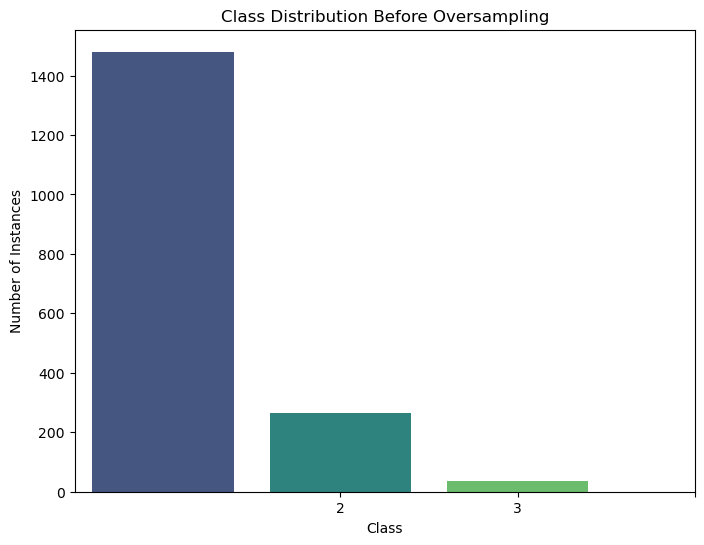

In [462]:
# Analyze class distribution before oversampling
class_counts_before = Counter(y)
print("Class distribution before oversampling:")
for label, count in class_counts_before.items():
    print(f"Class {label}: {count} instances")

# Plot the class distribution
def plot_class_distribution(class_counts, title):
    labels = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(8, 6))
    sns.barplot(x=labels, y=counts, palette='viridis')
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Number of Instances")
    plt.xticks(labels)
    plt.show()

plot_class_distribution(class_counts_before, "Class Distribution Before Oversampling")

In [463]:
# Apply SMOTE to handle class imbalance
X = df_no_outliers.drop(columns=['NSP'])
y = df_no_outliers['NSP']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

Class distribution after oversampling:
Class 2: 1480 instances
Class 1: 1480 instances
Class 3: 1480 instances


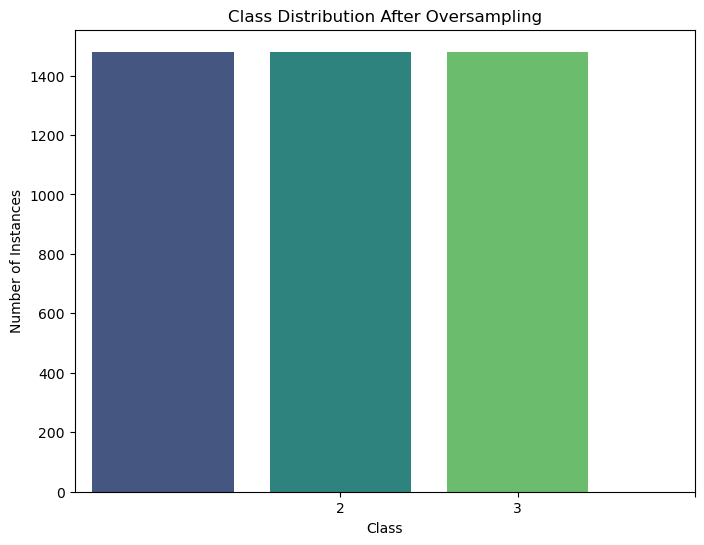

In [464]:
# Analyze class distribution after oversampling
class_counts_after = Counter(y_resampled)
print("Class distribution after oversampling:")
for label, count in class_counts_after.items():
    print(f"Class {label}: {count} instances")

# Plot the class distribution after oversampling
plot_class_distribution(class_counts_after, "Class Distribution After Oversampling")

In [465]:
# Standardize the features
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_resampled), columns=X.columns)
print("Preview of standardized features:")
print(X_standardized.head(10))

Preview of standardized features:
         LB        AC        FM        UC      ASTV      MSTV      ALTV  \
0 -1.668897 -0.452417 -0.285683 -0.958014  0.782890 -0.616637  1.469036   
1 -0.458376  1.224321 -0.285683  0.629884 -2.384387  1.553911 -0.866721   
2 -0.357499  0.385952 -0.285683  1.026858 -2.440946  1.553911 -0.866721   
3 -0.256622  0.385952 -0.285683  1.423833 -2.440946  1.960889 -0.866721   
4 -0.458376  1.224321 -0.285683  1.026858 -2.440946  1.960889 -0.866721   
5 -1.467144 -0.452417 -0.285683 -0.958014  1.348475 -0.616637 -0.540801   
6 -1.467144 -0.452417 -0.285683 -0.561039  1.405033 -0.616637 -0.595121   
7 -1.467144 -0.452417 -0.285683  0.232910  1.518150 -0.887955 -0.540801   
8 -0.559253  1.224321  4.054618  1.423833 -1.762243  0.604296 -0.866721   
9 -0.861883 -0.452417 -0.285683 -0.958014  1.178799 -0.616637 -0.866721   

       MLTV        DL   DS  ...     Width       Min       Max      Nmax  \
0 -1.196401 -0.527879  0.0  ...  0.217517 -1.287798 -2.214273 -0.

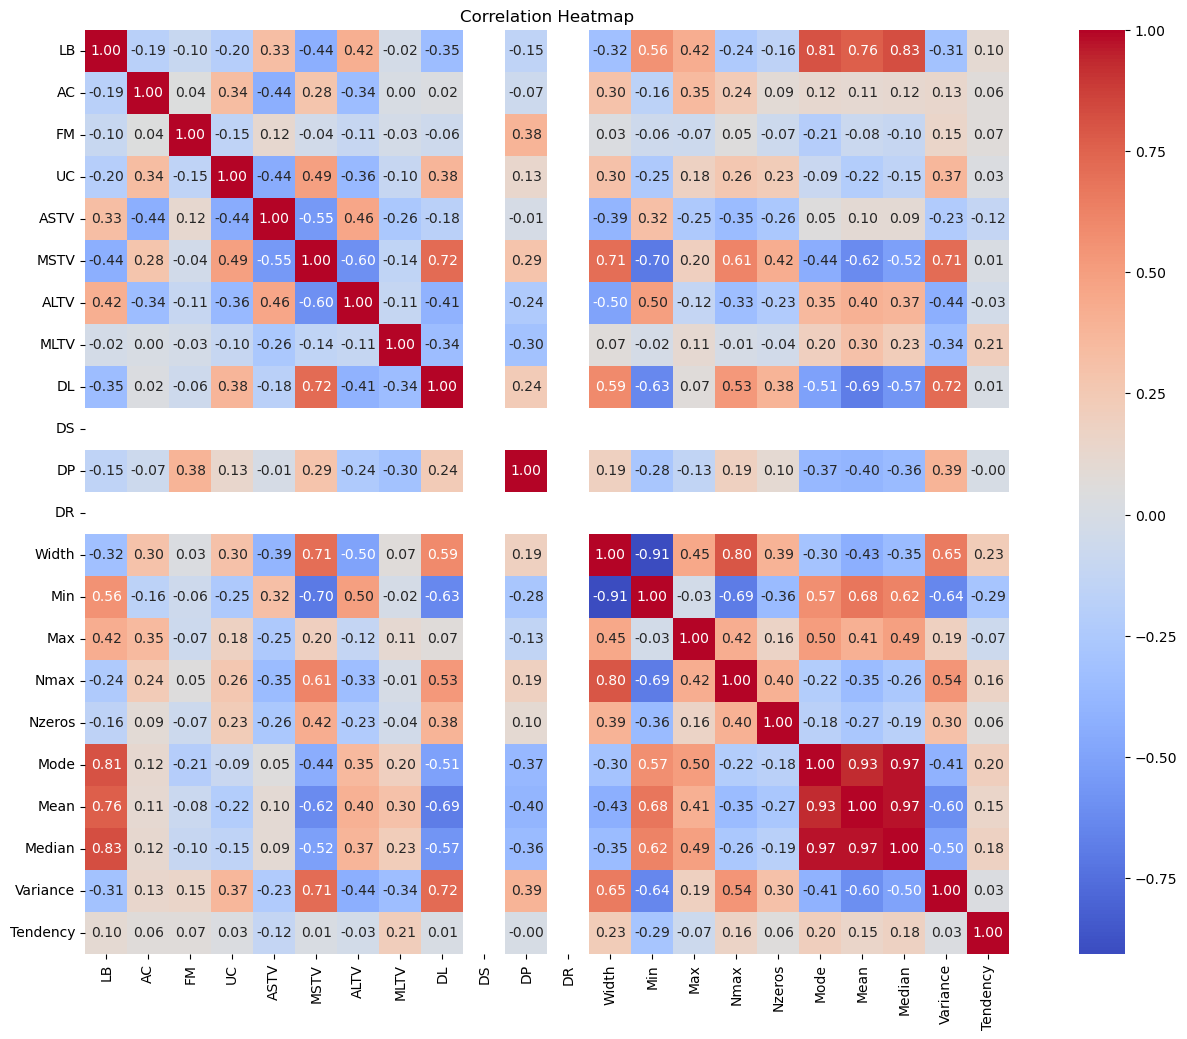

In [466]:
plt.figure(figsize=(18, 12))
correlation_matrix = X_standardized.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Heatmap")
plt.show()

In [467]:
X_standardized=X_standardized.drop(columns=['DS','DR'])

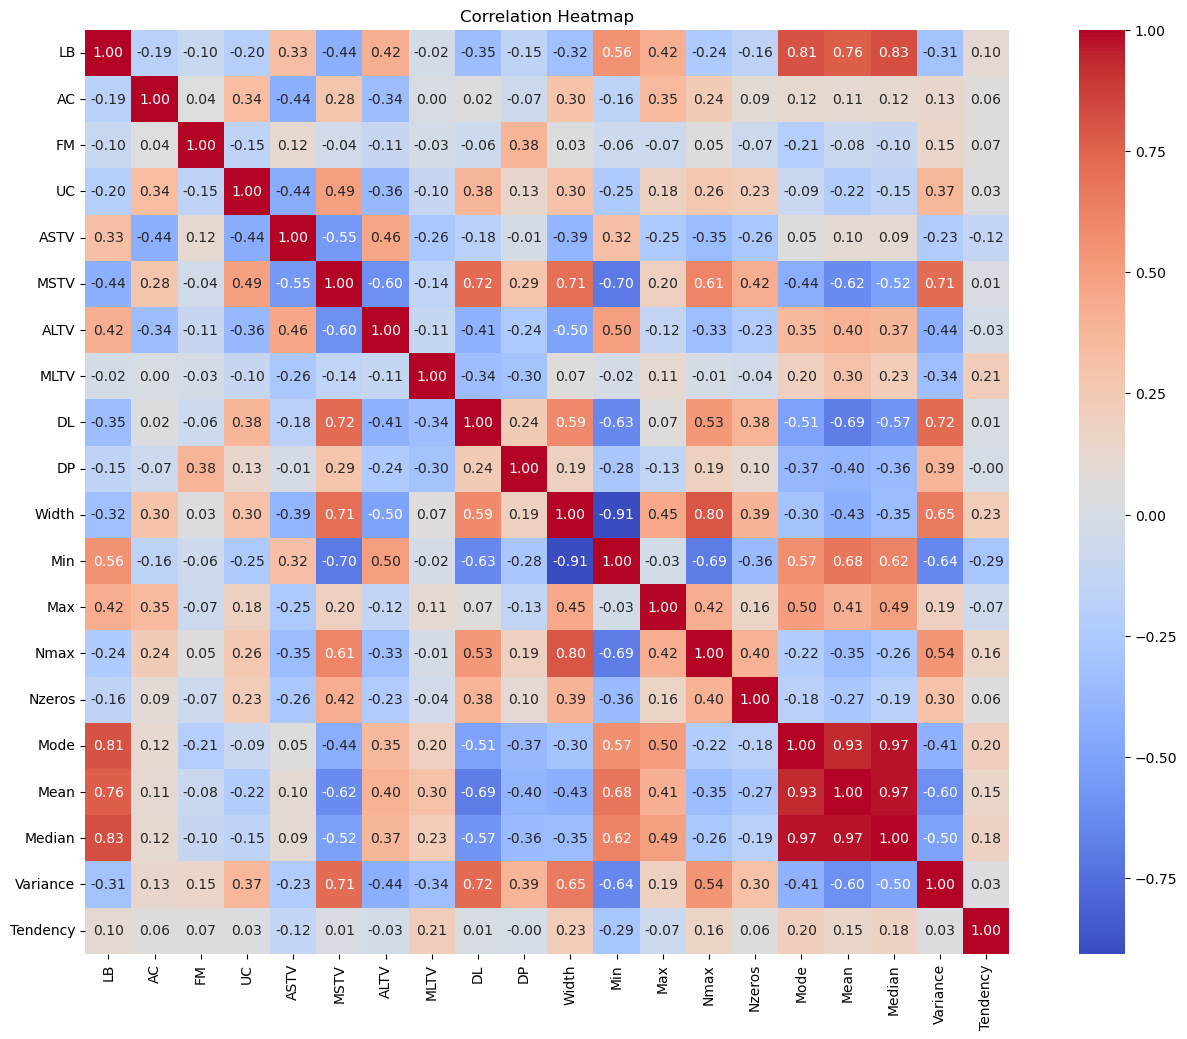

In [468]:
plt.figure(figsize=(18, 12))
correlation_matrix = X_standardized.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Heatmap")
plt.show()

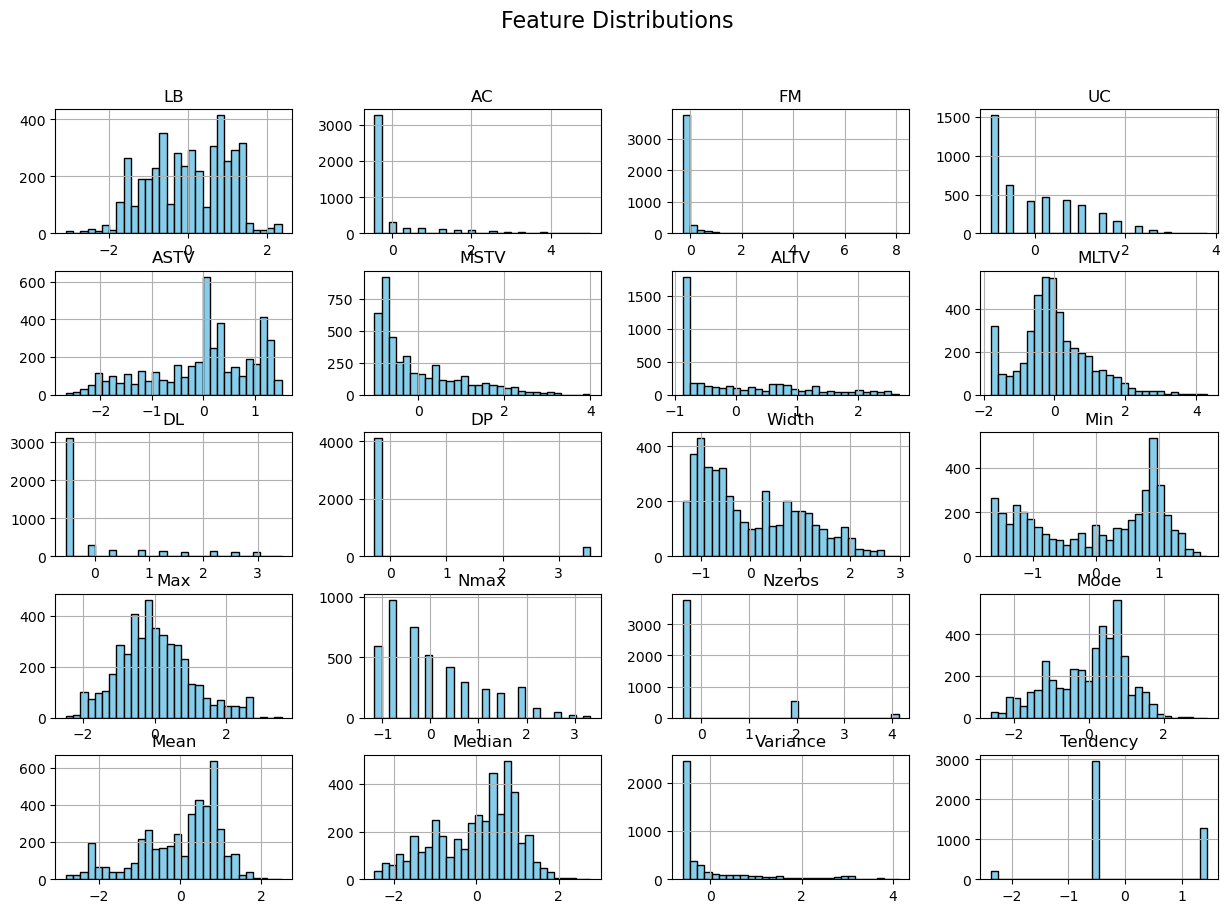

In [469]:
X_standardized.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

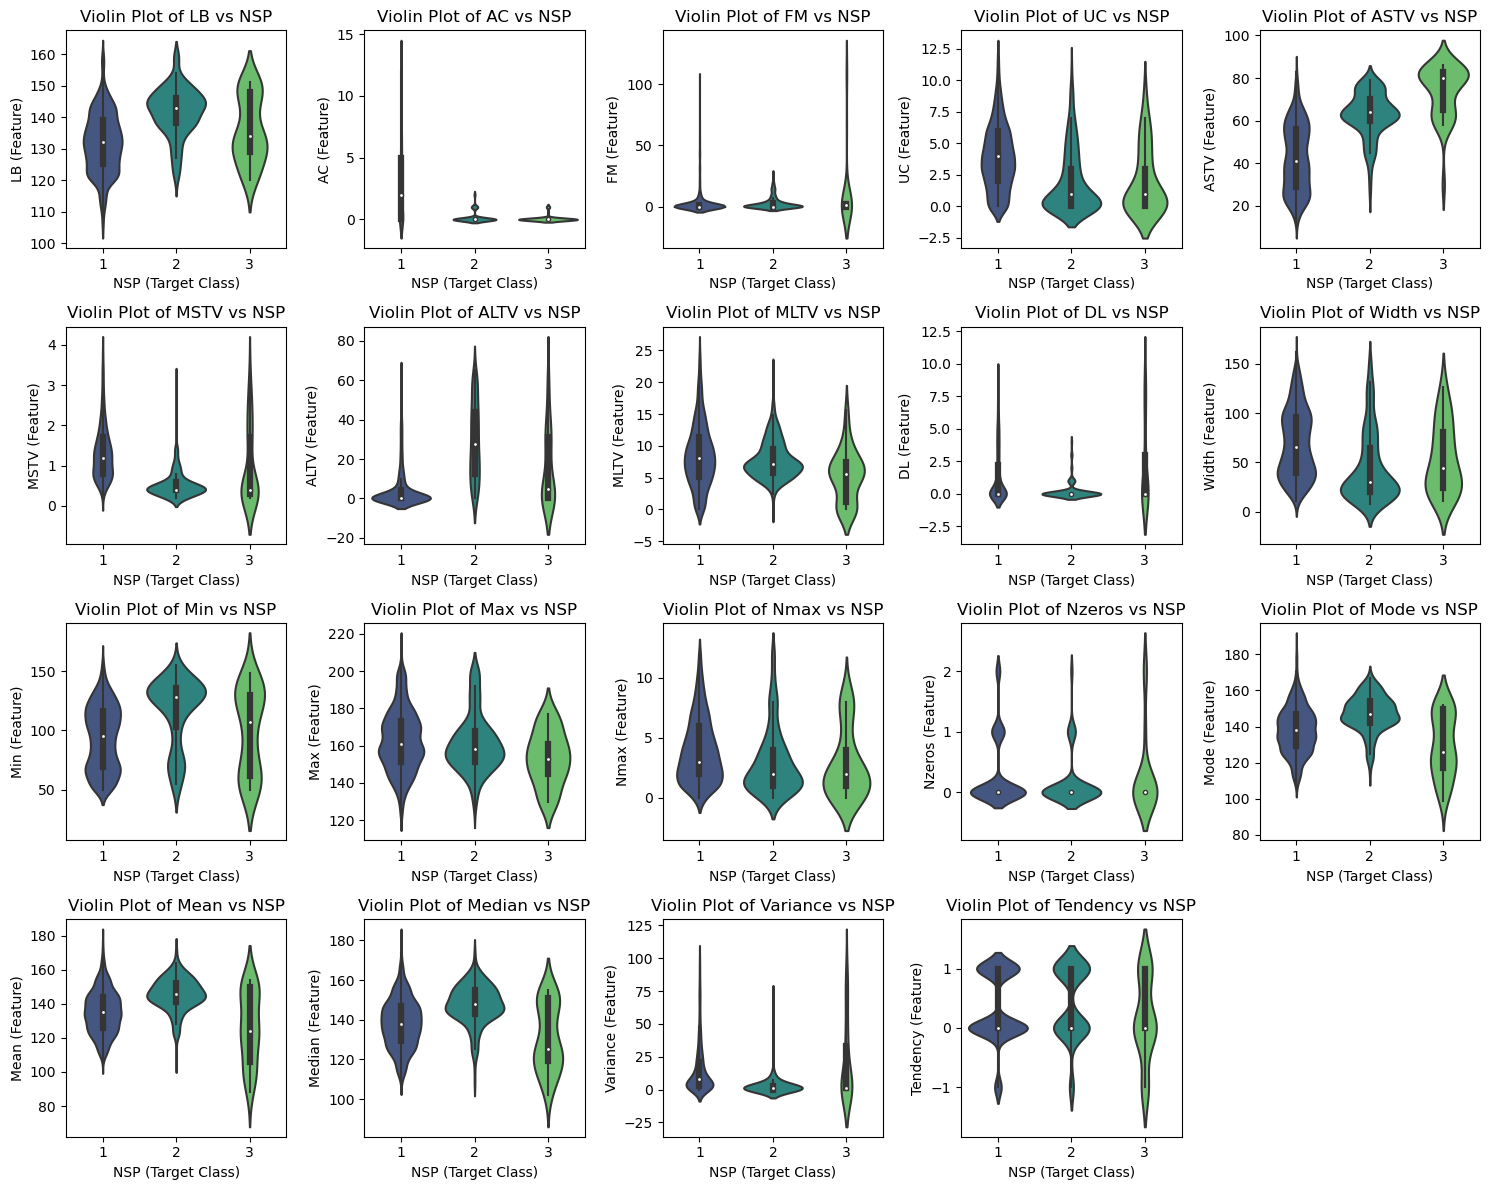

In [471]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features (excluding the dropped ones like 'DS', 'DR', etc.)
features = [ 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV',
            'DL', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency']

# Set up the number of columns in the plot grid (3 plots per row)
n_cols = 5
n_rows = (len(features) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create a figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))

# Flatten the axes array if it's multidimensional
axes = axes.flatten()

# Loop through the features and create a violin plot for each
for i, feature in enumerate(features):
    sns.violinplot(x='NSP', y=feature, data=df_no_outliers, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Violin Plot of {feature} vs NSP')
    axes[i].set_xlabel('NSP (Target Class)')
    axes[i].set_ylabel(f'{feature} (Feature)')

# Remove any unused axes (in case there are fewer features than subplots)
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


In [492]:
# Model 1: Using all features
X_all_features = X_standardized

# Model 2: Using selected features
X_selected_features = X_standardized[[ 'Median', 'AC',  'ASTV', 'MSTV', 'ALTV','UC',
            'DL', 'Width', 'Tendency']]

# Model 3: Using another set of features
X_feature_set_1 = X_standardized[['Median','AC', 'ASTV','MSTV','ALTV']]

# Model 4: Using another set of features
X_feature_set_2 = X_standardized[['AC', 'ASTV','MSTV','Median','DL']]

# Model 5: Using another set of features
X_feature_set_3 = X_standardized[['AC', 'ASTV','ALTV','MSTV','DL']]



In [493]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Train-Test split for Model 1 (using all features)
X_train, X_test, y_train, y_test = train_test_split(X_all_features, y_resampled, test_size=0.3, random_state=42)
rf_model_1 = RandomForestClassifier(random_state=42)
rf_model_1.fit(X_train, y_train)

# Train-Test split for Model 2 (using selected features)
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected_features, y_resampled, test_size=0.3, random_state=42)
rf_model_2 = RandomForestClassifier(random_state=42)
rf_model_2.fit(X_train_sel, y_train_sel)

# Train-Test split for Model 3 (using different features)
X_train_diff_1, X_test_diff_1, y_train_diff, y_test_diff = train_test_split(X_feature_set_1, y_resampled, test_size=0.3, random_state=42)
rf_model_3 = RandomForestClassifier(random_state=42)
rf_model_3.fit(X_train_diff, y_train_diff)

# Train-Test split for Model 4 (using another set of features)
X_train_diff_2, X_test_diff_2, y_train_diff_2, y_test_diff_2 = train_test_split(X_feature_set_2, y_resampled, test_size=0.3, random_state=42)
rf_model_4 = RandomForestClassifier(random_state=42)
rf_model_4.fit(X_train_diff_2, y_train_diff_2)

# Train-Test split for Model 5 (using another set of features)
X_train_diff_3, X_test_diff_3, y_train_diff_3, y_test_diff_3 = train_test_split(X_feature_set_3, y_resampled, test_size=0.3, random_state=42)
rf_model_5 = RandomForestClassifier(random_state=42)
rf_model_5.fit(X_train_diff_3, y_train_diff_3)




RandomForestClassifier(random_state=42)

In [494]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Model 1 Evaluation
y_pred_1 = rf_model_1.predict(X_test)
print("Model 1 (All Features) - Accuracy:", accuracy_score(y_test, y_pred_1))
print(classification_report(y_test, y_pred_1))

# Model 2 Evaluation
y_pred_2 = rf_model_2.predict(X_test_sel)
print("Model 2 (Selected Features) - Accuracy:", accuracy_score(y_test_sel, y_pred_2))
print(classification_report(y_test_sel, y_pred_2))

# Model 3 Evaluation
y_pred_3 = rf_model_3.predict(X_test_diff_1)
print("Model 3 (Different Features LIMITED TO 5 FEATURES) - Accuracy:", accuracy_score(y_test_diff, y_pred_3))
print(classification_report(y_test_diff, y_pred_3))

# Model 4 Evaluation
y_pred_4 = rf_model_4.predict(X_test_diff_2)
print("Model 4 (Different Features LIMITED TO 5 FEATURES) - Accuracy:", accuracy_score(y_test_diff_2, y_pred_4))
print(classification_report(y_test_diff_2, y_pred_4))

# Model 5 Evaluation
y_pred_5 = rf_model_5.predict(X_test_diff_3)
print("Model 5 (Different Features LIMITED TO 5 FEATURES) - Accuracy:", accuracy_score(y_test_diff_3, y_pred_5))
print(classification_report(y_test_diff_3, y_pred_5))

Model 1 (All Features) - Accuracy: 0.9744744744744744
              precision    recall  f1-score   support

           1       0.98      0.95      0.97       477
           2       0.95      0.98      0.96       452
           3       1.00      1.00      1.00       403

    accuracy                           0.97      1332
   macro avg       0.98      0.98      0.98      1332
weighted avg       0.97      0.97      0.97      1332

Model 2 (Selected Features) - Accuracy: 0.975975975975976
              precision    recall  f1-score   support

           1       0.99      0.95      0.97       477
           2       0.95      0.98      0.97       452
           3       0.99      1.00      1.00       403

    accuracy                           0.98      1332
   macro avg       0.98      0.98      0.98      1332
weighted avg       0.98      0.98      0.98      1332

Model 3 (Different Features LIMITED TO 5 FEATURES) - Accuracy: 0.9474474474474475
              precision    recall  f1-score 

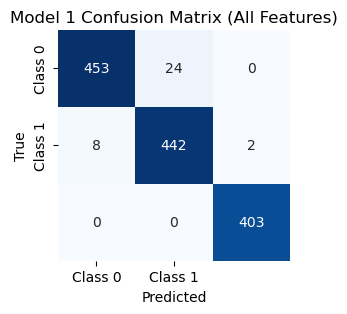

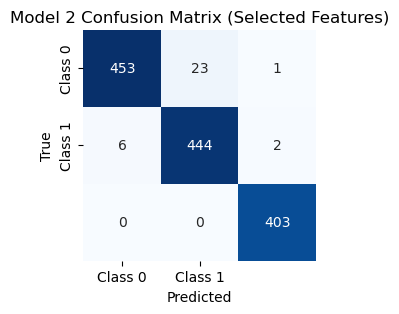

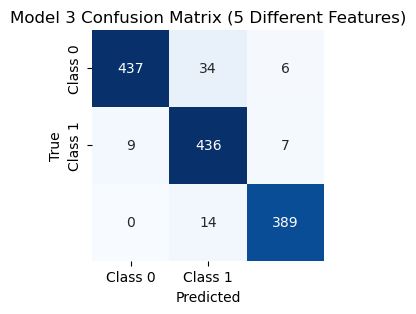

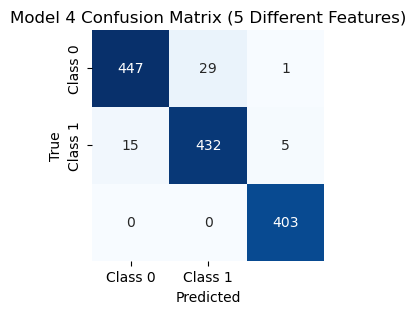

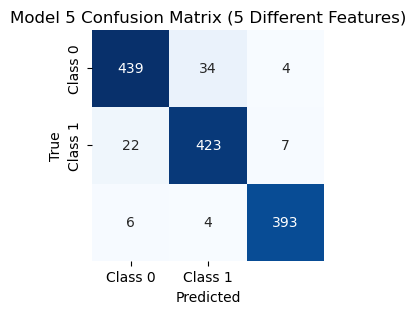

In [495]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrix for all models
plot_confusion_matrix(y_test, y_pred_1, "Model 1 Confusion Matrix (All Features)")
plot_confusion_matrix(y_test_sel, y_pred_2, "Model 2 Confusion Matrix (Selected Features)")
plot_confusion_matrix(y_test_diff, y_pred_3, "Model 3 Confusion Matrix (5 Different Features)")
plot_confusion_matrix(y_test_diff, y_pred_4, "Model 4 Confusion Matrix (5 Different Features)")
plot_confusion_matrix(y_test_diff, y_pred_5, "Model 5 Confusion Matrix (5 Different Features)")



Model 1 (All Features):
Tree 0 from the Random Forest:
|--- AC <= -0.24
|   |--- Mean <= -0.48
|   |   |--- Median <= -0.89
|   |   |   |--- Min <= -1.15
|   |   |   |   |--- ASTV <= -1.71
|   |   |   |   |   |--- Max <= -0.95
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- Max >  -0.95
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- ASTV >  -1.71
|   |   |   |   |   |--- ASTV <= -0.15
|   |   |   |   |   |   |--- Mode <= -1.59
|   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |--- Mode >  -1.59
|   |   |   |   |   |   |   |--- Mode <= -1.09
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- Mode >  -1.09
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- ASTV >  -0.15
|   |   |   |   |   |   |--- Mode <= -1.45
|   |   |   |   |   |   |   |--- UC <= 1.23
|   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |   |--- UC >  1.23
|   |   |   |   |   |   |   |   |--- class:

IndexError: list index out of range

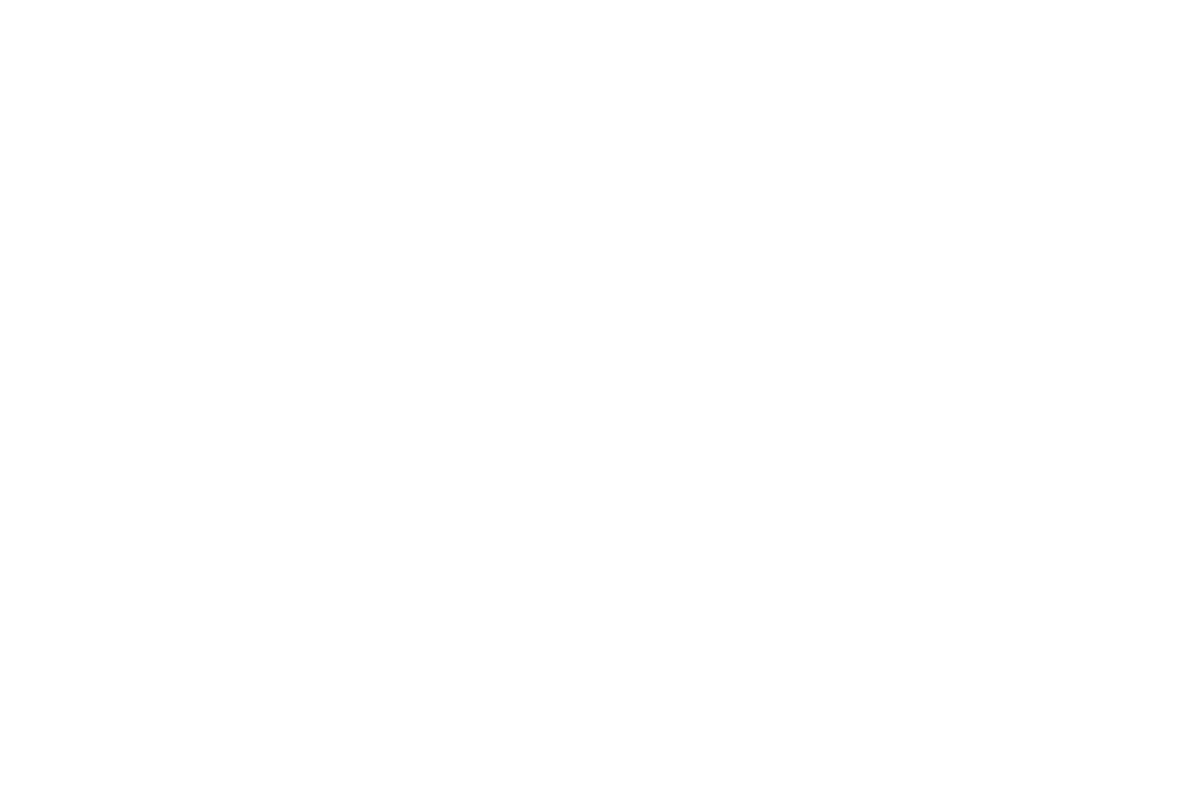

In [498]:
from sklearn.tree import export_text

# Function to print the tree from the Random Forest model
def print_tree_from_model(model, feature_names, tree_index=0):
    # Get the specific tree from the Random Forest model
    tree = model.estimators_[tree_index]
    
    # Convert feature_names to a list of strings
    feature_names_list = feature_names.tolist()
    
    # Print tree in text format
    print(f"Tree {tree_index} from the Random Forest:")
    tree_text = export_text(tree, feature_names=feature_names_list)
    print(tree_text)
    
    # Visualize the tree (optional)
    plt.figure(figsize=(15, 10))
    plot_tree(tree, filled=True, feature_names=feature_names_list, class_names=["Class 0", "Class 1"])  # Adjust class names if necessary
    plt.show()

# Call the function for each model
print("Model 1 (All Features):")
print_tree_from_model(rf_model_1, feature_names=X_all_features.columns)
